In [4]:
"""Demonstrate an example of using sanger_check to check Sanger sequencing results."""
%load_ext autoreload
%autoreload 2
import sanger_check as sc
from Bio.Seq import Seq
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Example multifasta file from Azenta
sanger_fasta_file = './data/sanger_example.fasta'

# Path to reference dna fasta
dna_fasta_file = './data/dna_example.fasta'

# Parse FASTA files
sanger_df = sc.parse_fasta(sanger_fasta_file)
dna_df = sc.parse_fasta(dna_fasta_file)

display(sanger_df)
display(dna_df)

,seq
280a_F98Y_K120G_1_For-T7_A08.ab1,NNNNNNNNNNNNNNNGNNNAANNNNNNNNNTCTNNNNNNNTTNTGN...
280a_F98Y_K120G_1_Rev-T7-Term_B08.ab1,NNNNNNNNNNNNNNNNNNNNNNNNNNNNTTCNTTTCNGGCTTTGTT...
280a_F98Y_K120G_2_For-T7_C08.ab1,NNNNNNNNNNNNNNNNNNNNNNTCCCTCTAGAATAATTTTGTTTAA...
280a_F98Y_K120G_2_Rev-T7-Term_D08.ab1,NNNNNNNNNNNNNNNNNNNNNNNNTTCNNCTTTGTTAGCAGCCGGA...
334a_N225T_1_For-T7_E08.ab1,NNNNNNNNNNNNNNNNNNNNGNANNNNNNNNCTNNNNNNATTTTGT...
334a_N225T_1_Rev-T7-Term_F08.ab1,NNNNNNNNNNNNNNNNNNNNNCNTTCGGGCTTTGTTAGCAGCCGGA...
334a_N225T_2_For-T7_G08.ab1,NNNNNNNNNNNNNNNGNNNNNNNNNNNNCTNNNNTNNTTTTGTTTA...
334a_N225T_2_Rev-T7-Term_H08.ab1,NNNNNNNNNNNTTTCGNGCTTTGTTAGCAGCCGGATCTCAGTGGTG...


,seq
280a,AACGGAAATAGTCGGGCGCCTTTGCAAGTCGCCATCGTGGGGGGCG...
334a,ATGTCAACCACAACCTCTGACGAAGAACCGTTAGAAATTGCTATAG...


In [6]:
# Assign sanger sequences to reference DNA 

# Data dataframe must have the following format:
# - Index: sanger sequence names
# - Column 1: reference DNA sequence names
# - Column 2: forward or reverse

auto = True

# Auto assign sanger sequences to reference DNA using pairwise alignment
if auto:
    data_df = sc.auto_assign(sanger_df, dna_df)
    data_df

else:
    # Manual assignment
    data_df = pd.DataFrame(columns = ['dna_seq', 'orientation'])
    data_df['280a_F98Y_K120G_1_For-T7_A08.ab1'] = ['280a', 'forward']
    

display(data_df)


Checking 280a_F98Y_K120G_1_For-T7_A08.ab1 against 280a:   0%|          | 0/8 [00:00<?, ?it/s]

Checking 334a_N225T_2_Rev-T7-Term_H08.ab1 against 334a: 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]     


,dna_seq,orientation
280a_F98Y_K120G_1_For-T7_A08.ab1,280a,forward
280a_F98Y_K120G_1_Rev-T7-Term_B08.ab1,280a,reverse
280a_F98Y_K120G_2_For-T7_C08.ab1,280a,forward
280a_F98Y_K120G_2_Rev-T7-Term_D08.ab1,280a,reverse
334a_N225T_1_For-T7_E08.ab1,334a,forward
334a_N225T_1_Rev-T7-Term_F08.ab1,334a,reverse
334a_N225T_2_For-T7_G08.ab1,334a,forward
334a_N225T_2_Rev-T7-Term_H08.ab1,334a,reverse


280a, 280a_F98Y_K120G_1_For-T7_A08.ab1:
	dna_seq: AACGGAAATAGTCGGGCGCCTTTGCAAGTCGCCATCGTGGGGGGCGGCCTGACCGGCCTTGCGCTGGCGTTAGGCCTGCTTCGCCGTAATATCAACTTCACAATCTACGAGCGGGCGGCGAGCTTTGGTGAACTTGGTGTGGGTATTCATTTTACTCCGAACGCGGAGCGGGCGATGGAAGCTTTGGATCCGCGTGTTCTGCAATCCTACGTGGACGTTGCAACGCCTGCGGAAGGGGGTTTTCTGAACTTTGTGGATGGCTACCGGGAAGGCGAAGAAGATGATCTTCTTTTTCAGCTGCACGTAGGTAAAGGTTACAAAGCTTGTCGCCGTTGCGATTTCGTTGATCAGCTTGTGAAACATATTCCGCAGGATCGCGTGCAATACGGCAAATGGCTCGAGAGTGTGGACGAAGATGGTGAGGGCCGTGTTGTTTTAACCTTCCGTGACGGTAGCACCGCGGAGGCGGATGTTGTCGTCGGGTGCGATGGCATTCGTAGCCGCGTGCGTGCTGCGATGTTTGGTGCAGGCCCATCGGCCCCTCGCGCACAGTACTCCCATCAATTGGCGTTTCGGGGTTTGGTGCCAATGGCGAAAGCGGTCGCGGTCCTCGGCCCGGAAAAAACGTCCCGCGCGGTGGGCCATTTGGGGCCCGGTGCATTCGTACTGACAATTCCATTGGCGGGGATCCATATGATGCATATTGAGGCTTTTGTAATGGACCCGCAAGAATGGCCGGAGGAACAAACGAAACGCTACGTTCTTCCAGCGACGCGCAATGAAGCCGAGCGCGCGTTTGCGGAGTTCGGCCCTACGGTTCGCAGTCTTATTAGTCTGCTGCCTGATAAATTGGACAAATGGGCCGTGTTTGATATGCTCGATACTCCGGCGCCGTCCTACGCTCACGGGCGGATGTGTCTGGCAGGCGATGCGGCGCATGCGAGCTCACC

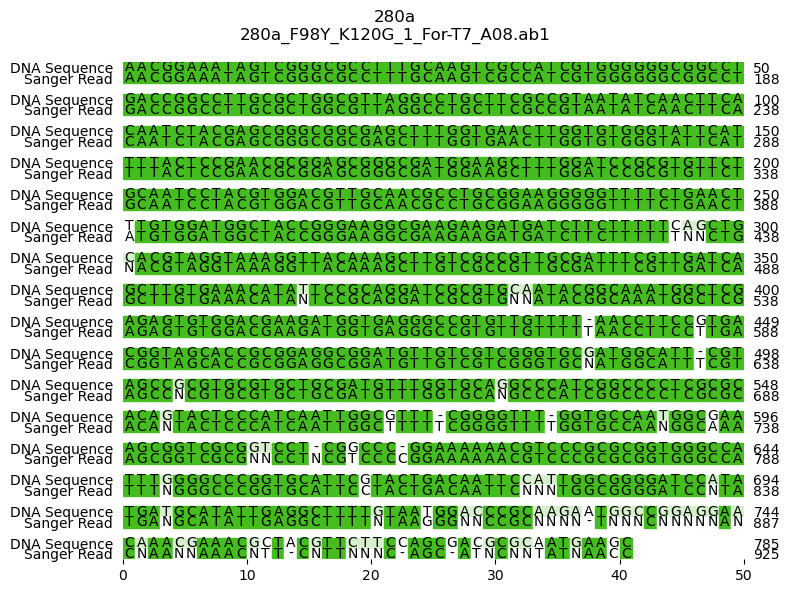

280a, 280a_F98Y_K120G_1_Rev-T7-Term_B08.ab1:
	dna_seq: AACGGAAATAGTCGGGCGCCTTTGCAAGTCGCCATCGTGGGGGGCGGCCTGACCGGCCTTGCGCTGGCGTTAGGCCTGCTTCGCCGTAATATCAACTTCACAATCTACGAGCGGGCGGCGAGCTTTGGTGAACTTGGTGTGGGTATTCATTTTACTCCGAACGCGGAGCGGGCGATGGAAGCTTTGGATCCGCGTGTTCTGCAATCCTACGTGGACGTTGCAACGCCTGCGGAAGGGGGTTTTCTGAACTTTGTGGATGGCTACCGGGAAGGCGAAGAAGATGATCTTCTTTTTCAGCTGCACGTAGGTAAAGGTTACAAAGCTTGTCGCCGTTGCGATTTCGTTGATCAGCTTGTGAAACATATTCCGCAGGATCGCGTGCAATACGGCAAATGGCTCGAGAGTGTGGACGAAGATGGTGAGGGCCGTGTTGTTTTAACCTTCCGTGACGGTAGCACCGCGGAGGCGGATGTTGTCGTCGGGTGCGATGGCATTCGTAGCCGCGTGCGTGCTGCGATGTTTGGTGCAGGCCCATCGGCCCCTCGCGCACAGTACTCCCATCAATTGGCGTTTCGGGGTTTGGTGCCAATGGCGAAAGCGGTCGCGGTCCTCGGCCCGGAAAAAACGTCCCGCGCGGTGGGCCATTTGGGGCCCGGTGCATTCGTACTGACAATTCCATTGGCGGGGATCCATATGATGCATATTGAGGCTTTTGTAATGGACCCGCAAGAATGGCCGGAGGAACAAACGAAACGCTACGTTCTTCCAGCGACGCGCAATGAAGCCGAGCGCGCGTTTGCGGAGTTCGGCCCTACGGTTCGCAGTCTTATTAGTCTGCTGCCTGATAAATTGGACAAATGGGCCGTGTTTGATATGCTCGATACTCCGGCGCCGTCCTACGCTCACGGGCGGATGTGTCTGGCAGGCGATGCGGCGCATGCGAGC

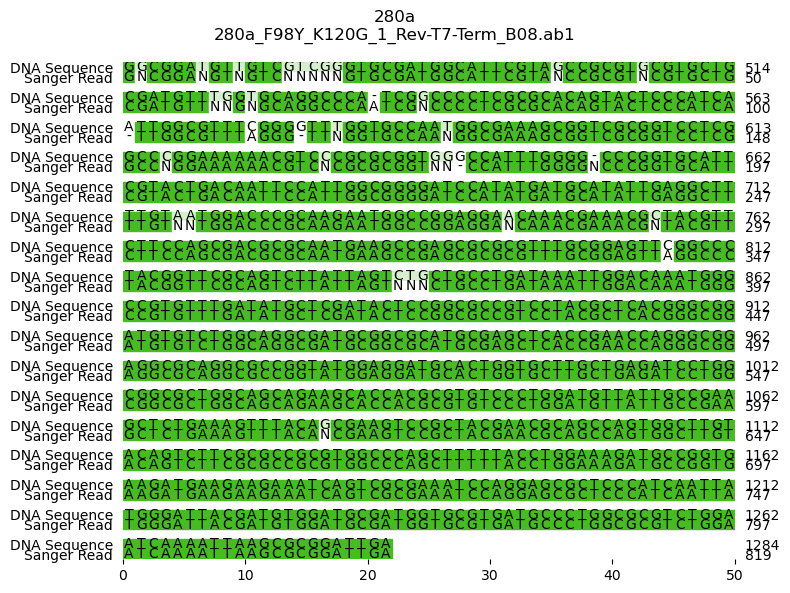

280a, 280a_F98Y_K120G_2_For-T7_C08.ab1:
	dna_seq: AACGGAAATAGTCGGGCGCCTTTGCAAGTCGCCATCGTGGGGGGCGGCCTGACCGGCCTTGCGCTGGCGTTAGGCCTGCTTCGCCGTAATATCAACTTCACAATCTACGAGCGGGCGGCGAGCTTTGGTGAACTTGGTGTGGGTATTCATTTTACTCCGAACGCGGAGCGGGCGATGGAAGCTTTGGATCCGCGTGTTCTGCAATCCTACGTGGACGTTGCAACGCCTGCGGAAGGGGGTTTTCTGAACTTTGTGGATGGCTACCGGGAAGGCGAAGAAGATGATCTTCTTTTTCAGCTGCACGTAGGTAAAGGTTACAAAGCTTGTCGCCGTTGCGATTTCGTTGATCAGCTTGTGAAACATATTCCGCAGGATCGCGTGCAATACGGCAAATGGCTCGAGAGTGTGGACGAAGATGGTGAGGGCCGTGTTGTTTTAACCTTCCGTGACGGTAGCACCGCGGAGGCGGATGTTGTCGTCGGGTGCGATGGCATTCGTAGCCGCGTGCGTGCTGCGATGTTTGGTGCAGGCCCATCGGCCCCTCGCGCACAGTACTCCCATCAATTGGCGTTTCGGGGTTTGGTGCCAATGGCGAAAGCGGTCGCGGTCCTCGGCCCGGAAAAAACGTCCCGCGCGGTGGGCCATTTGGGGCCCGGTGCATTCGTACTGACAATTCCATTGGCGGGGATCCATATGATGCATATTGAGGCTTTTGTAATGGACCCGCAAGAATGGCCGGAGGAACAAACGAAACGCTACGTTCTTCCAGCGACGCGCAATGAAGCCGAGCGCGCGTTTGCGGAGTTCGGCCCTACGGTTCGCAGTCTTATTAGTCTGCTGCCTGATAAATTGGACAAATGGGCCGTGTTTGATATGCTCGATACTCCGGCGCCGTCCTACGCTCACGGGCGGATGTGTCTGGCAGGCGATGCGGCGCATGCGAGCTCACC

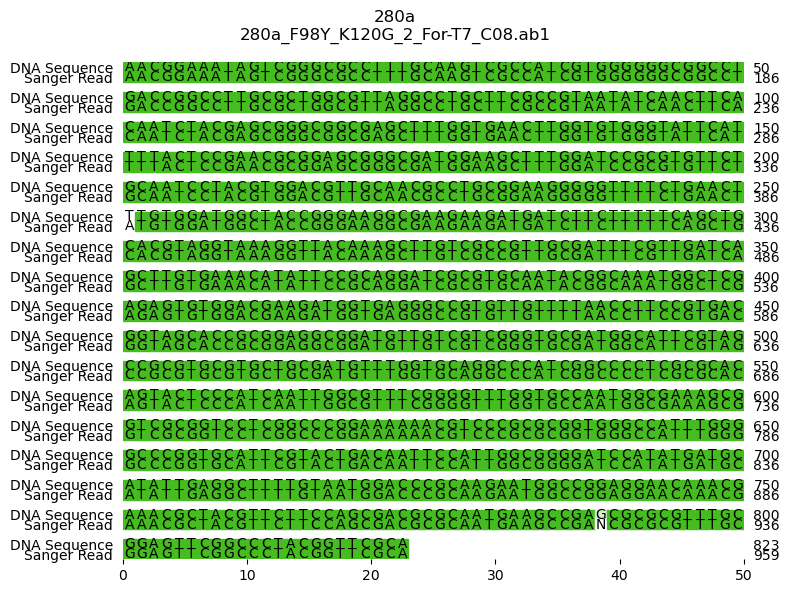

280a, 280a_F98Y_K120G_2_Rev-T7-Term_D08.ab1:
	dna_seq: AACGGAAATAGTCGGGCGCCTTTGCAAGTCGCCATCGTGGGGGGCGGCCTGACCGGCCTTGCGCTGGCGTTAGGCCTGCTTCGCCGTAATATCAACTTCACAATCTACGAGCGGGCGGCGAGCTTTGGTGAACTTGGTGTGGGTATTCATTTTACTCCGAACGCGGAGCGGGCGATGGAAGCTTTGGATCCGCGTGTTCTGCAATCCTACGTGGACGTTGCAACGCCTGCGGAAGGGGGTTTTCTGAACTTTGTGGATGGCTACCGGGAAGGCGAAGAAGATGATCTTCTTTTTCAGCTGCACGTAGGTAAAGGTTACAAAGCTTGTCGCCGTTGCGATTTCGTTGATCAGCTTGTGAAACATATTCCGCAGGATCGCGTGCAATACGGCAAATGGCTCGAGAGTGTGGACGAAGATGGTGAGGGCCGTGTTGTTTTAACCTTCCGTGACGGTAGCACCGCGGAGGCGGATGTTGTCGTCGGGTGCGATGGCATTCGTAGCCGCGTGCGTGCTGCGATGTTTGGTGCAGGCCCATCGGCCCCTCGCGCACAGTACTCCCATCAATTGGCGTTTCGGGGTTTGGTGCCAATGGCGAAAGCGGTCGCGGTCCTCGGCCCGGAAAAAACGTCCCGCGCGGTGGGCCATTTGGGGCCCGGTGCATTCGTACTGACAATTCCATTGGCGGGGATCCATATGATGCATATTGAGGCTTTTGTAATGGACCCGCAAGAATGGCCGGAGGAACAAACGAAACGCTACGTTCTTCCAGCGACGCGCAATGAAGCCGAGCGCGCGTTTGCGGAGTTCGGCCCTACGGTTCGCAGTCTTATTAGTCTGCTGCCTGATAAATTGGACAAATGGGCCGTGTTTGATATGCTCGATACTCCGGCGCCGTCCTACGCTCACGGGCGGATGTGTCTGGCAGGCGATGCGGCGCATGCGAGC

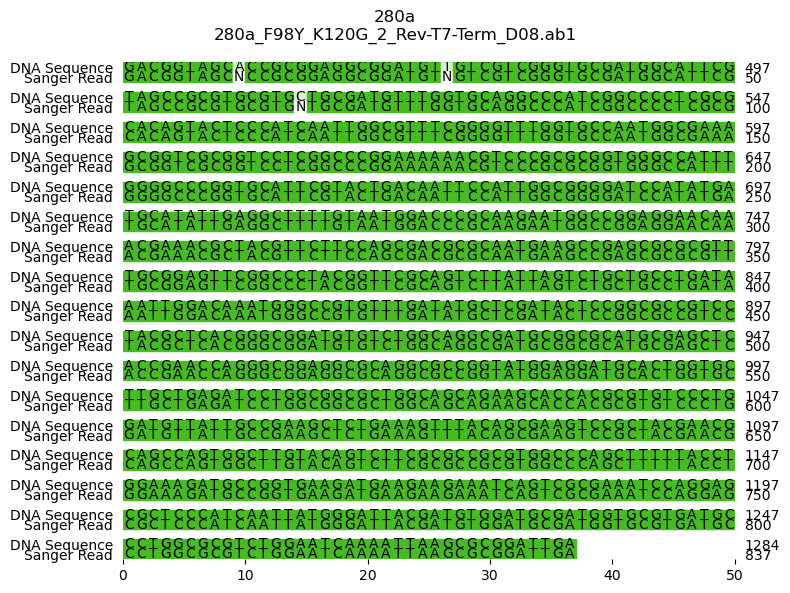

334a, 334a_N225T_1_For-T7_E08.ab1:
	dna_seq: ATGTCAACCACAACCTCTGACGAAGAACCGTTAGAAATTGCTATAGTGGGTGGTGGAATCGTGGGCCTGGTCTTGGCTGCGGGTCTGATTCGACAGAATATTAAAGTTAAGGTTTATGAACAAGCACAAGGCTTTCGTGAGATTGGCGCTGGAATTGCGTTTACCGCTAATGCGATTAGATGTATGGAAATGATTGATCCTGCCATTGTCACCGCACTGCGCTCGGGTAGCGTGGCTACAAGTAGTGGAGATGAAGATGACCCCAATGATTATCTGAGGTGGATAGATGGCTATAACCAGCATCGTAAAGACGACCCGTATTATCAGCGTCTGCTGTATAAGTTGGACGCGGGTTATAAAGGGTTTGAGGGGTGTAGGCGAGATCAATTTTTGGAGGAATTAGTAAAGATTATTCCAGAGGGTGTGATAGAATTTAAAAAACGTTTAGAAAGCATCGAAGAACGCGGCGACGACGGGAAGATTGTCCTGAAATTCACTGATGGCACGACAGCGGAGGCAGACGCAGTCATTGGGTGCGACGGAATTAAATCCCGTGTACGCGAGATAATTTTAGGTGAAGATAATCCAGCTAGCTATCCACACTACACTCATAAAGTAGCTTATCGTGCACTTATACCTATGGATAAAGCTATCGAAGCTCTTGGAGAATATAAAGCTCGGAATCAACACATGCATGTTGGTCCAAATGCGCACTTAATTCACTATCCTGTGGCCAACCAAACCATGATTAATGCGACAGCGTTCGTATCTGATCCGAATGAATGGCCTGATGATAAGCAGACTGTAGCACCGGGGAGTCGCGAGGACGTCGAAGAGGCCTTTGCGGGATGGAACCCATGCGTGCGTGATCTCATCAACCTGTTTCCTGAGAAACTGGATAAATGGGCCGTCTTTGATCTGTGGGATTACCCGGCACCGTATTACAACAAGGGTC

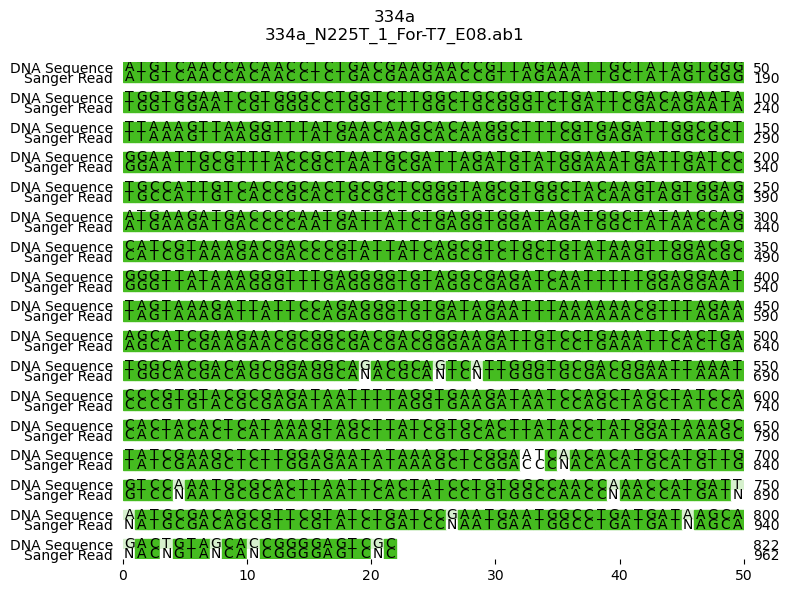

334a, 334a_N225T_1_Rev-T7-Term_F08.ab1:
	dna_seq: ATGTCAACCACAACCTCTGACGAAGAACCGTTAGAAATTGCTATAGTGGGTGGTGGAATCGTGGGCCTGGTCTTGGCTGCGGGTCTGATTCGACAGAATATTAAAGTTAAGGTTTATGAACAAGCACAAGGCTTTCGTGAGATTGGCGCTGGAATTGCGTTTACCGCTAATGCGATTAGATGTATGGAAATGATTGATCCTGCCATTGTCACCGCACTGCGCTCGGGTAGCGTGGCTACAAGTAGTGGAGATGAAGATGACCCCAATGATTATCTGAGGTGGATAGATGGCTATAACCAGCATCGTAAAGACGACCCGTATTATCAGCGTCTGCTGTATAAGTTGGACGCGGGTTATAAAGGGTTTGAGGGGTGTAGGCGAGATCAATTTTTGGAGGAATTAGTAAAGATTATTCCAGAGGGTGTGATAGAATTTAAAAAACGTTTAGAAAGCATCGAAGAACGCGGCGACGACGGGAAGATTGTCCTGAAATTCACTGATGGCACGACAGCGGAGGCAGACGCAGTCATTGGGTGCGACGGAATTAAATCCCGTGTACGCGAGATAATTTTAGGTGAAGATAATCCAGCTAGCTATCCACACTACACTCATAAAGTAGCTTATCGTGCACTTATACCTATGGATAAAGCTATCGAAGCTCTTGGAGAATATAAAGCTCGGAATCAACACATGCATGTTGGTCCAAATGCGCACTTAATTCACTATCCTGTGGCCAACCAAACCATGATTAATGCGACAGCGTTCGTATCTGATCCGAATGAATGGCCTGATGATAAGCAGACTGTAGCACCGGGGAGTCGCGAGGACGTCGAAGAGGCCTTTGCGGGATGGAACCCATGCGTGCGTGATCTCATCAACCTGTTTCCTGAGAAACTGGATAAATGGGCCGTCTTTGATCTGTGGGATTACCCGGCACCGTATTACAACAA

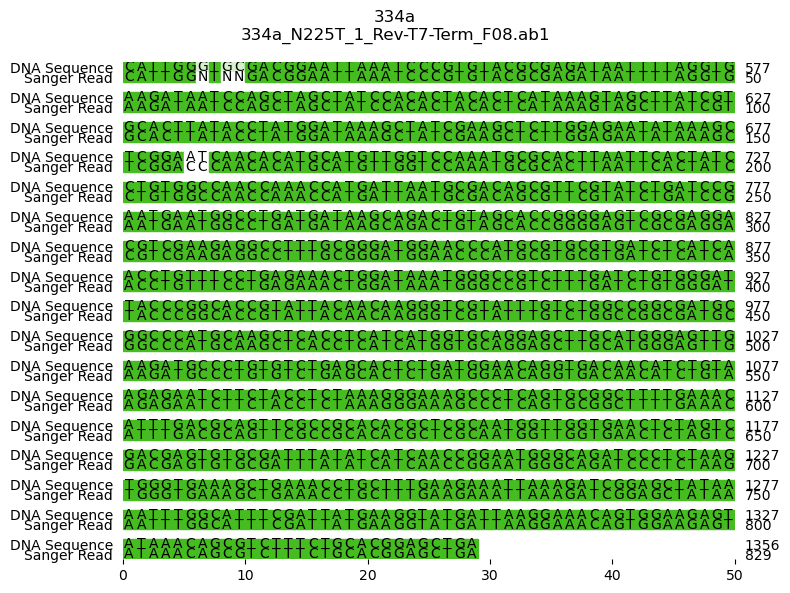

334a, 334a_N225T_2_For-T7_G08.ab1:
	dna_seq: ATGTCAACCACAACCTCTGACGAAGAACCGTTAGAAATTGCTATAGTGGGTGGTGGAATCGTGGGCCTGGTCTTGGCTGCGGGTCTGATTCGACAGAATATTAAAGTTAAGGTTTATGAACAAGCACAAGGCTTTCGTGAGATTGGCGCTGGAATTGCGTTTACCGCTAATGCGATTAGATGTATGGAAATGATTGATCCTGCCATTGTCACCGCACTGCGCTCGGGTAGCGTGGCTACAAGTAGTGGAGATGAAGATGACCCCAATGATTATCTGAGGTGGATAGATGGCTATAACCAGCATCGTAAAGACGACCCGTATTATCAGCGTCTGCTGTATAAGTTGGACGCGGGTTATAAAGGGTTTGAGGGGTGTAGGCGAGATCAATTTTTGGAGGAATTAGTAAAGATTATTCCAGAGGGTGTGATAGAATTTAAAAAACGTTTAGAAAGCATCGAAGAACGCGGCGACGACGGGAAGATTGTCCTGAAATTCACTGATGGCACGACAGCGGAGGCAGACGCAGTCATTGGGTGCGACGGAATTAAATCCCGTGTACGCGAGATAATTTTAGGTGAAGATAATCCAGCTAGCTATCCACACTACACTCATAAAGTAGCTTATCGTGCACTTATACCTATGGATAAAGCTATCGAAGCTCTTGGAGAATATAAAGCTCGGAATCAACACATGCATGTTGGTCCAAATGCGCACTTAATTCACTATCCTGTGGCCAACCAAACCATGATTAATGCGACAGCGTTCGTATCTGATCCGAATGAATGGCCTGATGATAAGCAGACTGTAGCACCGGGGAGTCGCGAGGACGTCGAAGAGGCCTTTGCGGGATGGAACCCATGCGTGCGTGATCTCATCAACCTGTTTCCTGAGAAACTGGATAAATGGGCCGTCTTTGATCTGTGGGATTACCCGGCACCGTATTACAACAAGGGTC

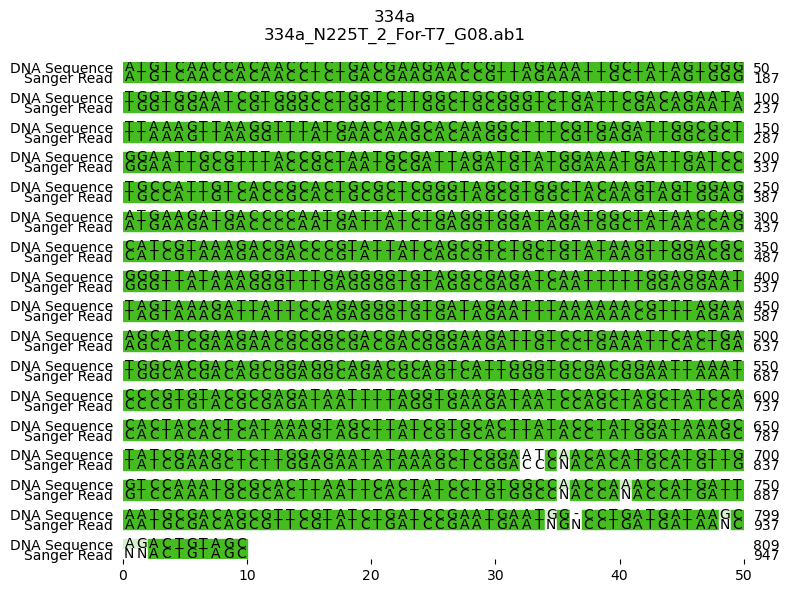

334a, 334a_N225T_2_Rev-T7-Term_H08.ab1:
	dna_seq: ATGTCAACCACAACCTCTGACGAAGAACCGTTAGAAATTGCTATAGTGGGTGGTGGAATCGTGGGCCTGGTCTTGGCTGCGGGTCTGATTCGACAGAATATTAAAGTTAAGGTTTATGAACAAGCACAAGGCTTTCGTGAGATTGGCGCTGGAATTGCGTTTACCGCTAATGCGATTAGATGTATGGAAATGATTGATCCTGCCATTGTCACCGCACTGCGCTCGGGTAGCGTGGCTACAAGTAGTGGAGATGAAGATGACCCCAATGATTATCTGAGGTGGATAGATGGCTATAACCAGCATCGTAAAGACGACCCGTATTATCAGCGTCTGCTGTATAAGTTGGACGCGGGTTATAAAGGGTTTGAGGGGTGTAGGCGAGATCAATTTTTGGAGGAATTAGTAAAGATTATTCCAGAGGGTGTGATAGAATTTAAAAAACGTTTAGAAAGCATCGAAGAACGCGGCGACGACGGGAAGATTGTCCTGAAATTCACTGATGGCACGACAGCGGAGGCAGACGCAGTCATTGGGTGCGACGGAATTAAATCCCGTGTACGCGAGATAATTTTAGGTGAAGATAATCCAGCTAGCTATCCACACTACACTCATAAAGTAGCTTATCGTGCACTTATACCTATGGATAAAGCTATCGAAGCTCTTGGAGAATATAAAGCTCGGAATCAACACATGCATGTTGGTCCAAATGCGCACTTAATTCACTATCCTGTGGCCAACCAAACCATGATTAATGCGACAGCGTTCGTATCTGATCCGAATGAATGGCCTGATGATAAGCAGACTGTAGCACCGGGGAGTCGCGAGGACGTCGAAGAGGCCTTTGCGGGATGGAACCCATGCGTGCGTGATCTCATCAACCTGTTTCCTGAGAAACTGGATAAATGGGCCGTCTTTGATCTGTGGGATTACCCGGCACCGTATTACAACAA

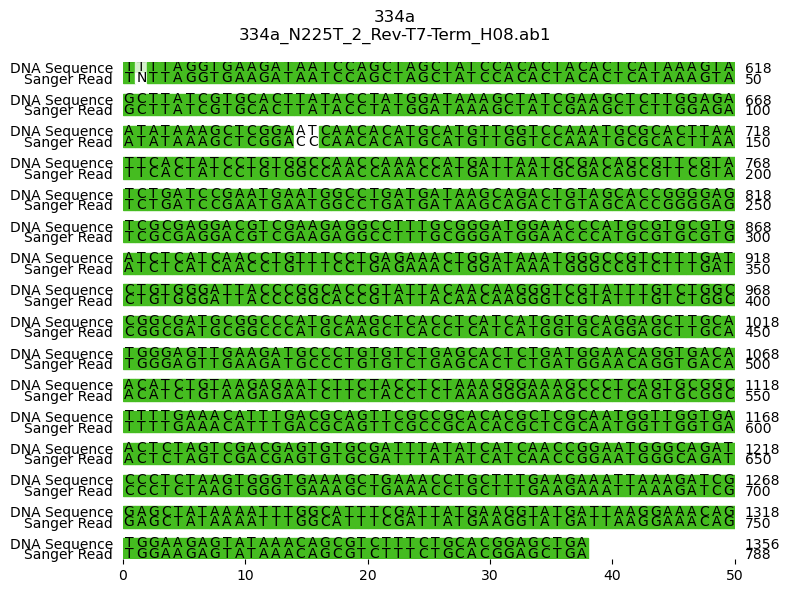

In [7]:
# Check sanger sequences
for sanger_seq_name in data_df.index:

    # Retrieve data
    dna_seq_name = data_df.loc[sanger_seq_name, "dna_seq"]
    orientation = data_df.loc[sanger_seq_name, "orientation"]

    # Retrieve sequences
    sanger_seq = sanger_df.loc[sanger_seq_name, "seq"]
    dna_seq = dna_df.loc[dna_seq_name, "seq"]

    # Get reverse complement if necessary
    if orientation == "reverse":
        sanger_seq = str(Seq(sanger_seq).reverse_complement())
    
    # Check sanger sequence
    sc.check_sanger_sequence(dna_seq_name,
        dna_seq,
        sanger_seq_name,
        sanger_seq, 
        plot = True)
